In [1]:
# Dependencies
import pandas as pd
import gmaps
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

from gkey import gkey

# Import Suitable_Wind.csv as a dataframe
suitable_wind_df = pd.read_csv("../Resources/Suitable_Wind.csv")

suitable_wind_df.head()


,ID,Element,State,Value,Latitude,Longitude,Elevation
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1


In [66]:
# Add a new empty column"City"
suitable_wind_df["City"]=""


In [443]:
# Identify nearest city for each lat, lng combination in suitable_wind_df
# Put city name in suitable_wind_df 
params = {"key": gkey}

# Run a lat/long search for each city

for index, row in suitable_wind_df.iterrows():
    latlng = f"{row['Latitude']},{row['Longitude']}"
    url = "https://maps.googleapis.com/maps/api/geocode/json?latlng="+ latlng + "&sensor=false"
    # make request
    try:
        response = requests.get(url, params=params)
        Data = response.json()
        location = list(Data['results'][0].values())[0]
           
    except:
        print("I cann't find the City name corresponding to the latitude and longitude " + latlng)
        
    else: 
        for i in location:
            if i['types']== ['locality', 'political']:
                suitable_wind_df.loc[index,'City']= i['long_name']
                
                  
   

I cann't find the City name corresponding to the latitude and longitude 27.653100000000176,-80.2428


In [6]:
# Output the first five rows to check
suitable_wind_df.head()

,ID,Element,State,Value,Latitude,Longitude,Elevation
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1


In [445]:
# Save the dataframe as csv file
suitable_wind_df.to_csv("../Resources/Suitable_Wind_City.csv")

In [2]:
suitable_wind_df= pd.read_csv("../Resources/Suitable_Wind_City.csv")
suitable_wind_df = suitable_wind_df.drop(['Unnamed: 0'],axis=1)

In [71]:
suitable_wind_df.head()



,ID,Element,State,Value,Latitude,Longitude,Elevation,City
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4,Akron
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2,Fleming
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9,Georgetown
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7,Ogden
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Millers


In [3]:
wind_citypop_df = suitable_wind_df
wind_citypop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 8 columns):
ID           449 non-null object
Element      449 non-null object
State        449 non-null object
Value        449 non-null float64
Latitude     449 non-null float64
Longitude    449 non-null float64
Elevation    449 non-null float64
City         440 non-null object
dtypes: float64(4), object(4)
memory usage: 28.1+ KB


In [4]:
# Find the rows contain null values
wind_citypop_df[wind_citypop_df['City'].isnull()]

,ID,Element,State,Value,Latitude,Longitude,Elevation,City
49,USW00004134,AWND,UT,37.353627,40.1606,-113.3508,1310.6,NaN
73,USW00012843,AWND,FL,36.803081,27.6531,-80.2428,8.5,NaN
145,USW00014732,AWND,NY,51.324235,40.7794,-73.8803,3.4,NaN
180,USW00014852,AWND,OH,38.928184,41.2544,-80.6739,359.7,NaN
208,USW00014941,AWND,NE,47.836581,41.9856,-97.4353,472.7,NaN
239,USW00023055,AWND,TX,82.882893,31.8311,-104.8089,1663.0,NaN
329,USW00053144,AWND,CA,40.543598,34.9883,-117.8647,695.9,NaN
330,USW00053145,AWND,NV,41.545163,37.6172,-116.2642,1755.6,NaN
410,USW00094789,AWND,NY,50.220504,40.6386,-73.7622,3.4,NaN


In [5]:
# Fill the missing data 
# Resource : https://www.latlong.net/Show-Latitude-Longitude.html
wind_citypop_df.loc[49,'City']='Dugway'
wind_citypop_df.loc[145,'City']="Queens"
wind_citypop_df.loc[180,'City']='Vienna'
wind_citypop_df.loc[208,'City']='Norfolk'
wind_citypop_df.loc[239,'City']='Salt Flat'
wind_citypop_df.loc[329,'City']='Edwards'
wind_citypop_df.loc[330,'City']='Amargosa Valley'
wind_citypop_df.loc[410,'City']="Queens"

In [6]:
# Recheck
wind_citypop_df[wind_citypop_df['City'].isnull()]

,ID,Element,State,Value,Latitude,Longitude,Elevation,City
73,USW00012843,AWND,FL,36.803081,27.6531,-80.2428,8.5,NaN


In [7]:
# Import uscitiesv1.4.csv as a dataframe
# uscitiesv1.4.csv is a dataset about population for each USA city in 2016.
city_density_df= pd.read_csv("../Resources/uscitiesv1.4.csv")

city_density_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Whitestone Logging Camp,Whitestone Logging Camp,AK,Alaska,2105,Hoonah-Angoon,58.0653,-135.4200,NaN,NaN,0.0,polygon,False,America/Juneau,99829 99825,1840023688
1,Portage Creek,Portage Creek,AK,Alaska,2070,Dillingham,58.9049,-157.6690,NaN,NaN,0.0,polygon,False,America/Anchorage,99576,1840023660
2,Talkeetna,Talkeetna,AK,Alaska,2170,Matanuska-Susitna,62.2753,-150.0814,NaN,NaN,195.2,polygon,False,America/Anchorage,99676,1840023375
3,King Salmon,King Salmon,AK,Alaska,2060,Bristol Bay,58.7540,-156.5066,NaN,NaN,0.0,polygon,False,America/Anchorage,99613,1840023272
4,Edna Bay,Edna Bay,AK,Alaska,2198,Prince of Wales-Hyder,55.9645,-133.6665,43.0,43.0,0.0,polygon,True,America/Sitka,99921,1840000514


In [8]:
# Convert the first letter of the column name of  city_densiity_df to uppercase
city_density_df.columns = [i.title() for i in city_density_df.columns]
# Rename column
city_density_df = city_density_df.rename(columns={'State_Id':"State"})
city_density_df.head()

,City,City_Ascii,State,State_Name,County_Fips,County_Name,Lat,Lng,Population,Population_Proper,Density,Source,Incorporated,Timezone,Zips,Id
0,Whitestone Logging Camp,Whitestone Logging Camp,AK,Alaska,2105,Hoonah-Angoon,58.0653,-135.4200,NaN,NaN,0.0,polygon,False,America/Juneau,99829 99825,1840023688
1,Portage Creek,Portage Creek,AK,Alaska,2070,Dillingham,58.9049,-157.6690,NaN,NaN,0.0,polygon,False,America/Anchorage,99576,1840023660
2,Talkeetna,Talkeetna,AK,Alaska,2170,Matanuska-Susitna,62.2753,-150.0814,NaN,NaN,195.2,polygon,False,America/Anchorage,99676,1840023375
3,King Salmon,King Salmon,AK,Alaska,2060,Bristol Bay,58.7540,-156.5066,NaN,NaN,0.0,polygon,False,America/Anchorage,99613,1840023272
4,Edna Bay,Edna Bay,AK,Alaska,2198,Prince of Wales-Hyder,55.9645,-133.6665,43.0,43.0,0.0,polygon,True,America/Sitka,99921,1840000514


In [9]:
# Check if there are cities have the same names in the same states
city_density_df[['City_Ascii','State']].duplicated().sum()

0

In [10]:
# Rename the column
city_density_df= city_density_df[["City_Ascii","State","Density"]]
city_density_df =  city_density_df.rename(columns={'City_Ascii':"City"})
#wind_citypop_df=wind_citypop_df.merge(city_density_df,on=["City",'State'],how='left')

In [11]:
wind_citypop_df = wind_citypop_df.merge(city_density_df,on=['City','State'],how='left')

In [12]:
wind_citypop_df.head()

,ID,Element,State,Value,Latitude,Longitude,Elevation,City,Density
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4,Akron,255.0
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2,Fleming,296.0
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9,Georgetown,422.0
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7,Ogden,544.0
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Millers,NaN


In [13]:
wind_citypop_df.loc[73,"Density"]= 0.0

In [14]:
# Check if there are duplicated rows in the dataset
wind_citypop_df.duplicated().sum()


0

In [15]:
wind_citypop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 9 columns):
ID           449 non-null object
Element      449 non-null object
State        449 non-null object
Value        449 non-null float64
Latitude     449 non-null float64
Longitude    449 non-null float64
Elevation    449 non-null float64
City         448 non-null object
Density      425 non-null float64
dtypes: float64(5), object(4)
memory usage: 55.1+ KB


In [16]:
# Display the rows containing missing values
wind_citypop_df[wind_citypop_df['Density'].isnull()]

,ID,Element,State,Value,Latitude,Longitude,Elevation,City,Density
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Millers,NaN
21,USW00003160,AWND,NV,40.589017,36.6206,-116.0278,984.5,Mercury,NaN
57,USW00004836,AWND,ME,41.488382,47.2856,-68.3133,301.1,Frenchville,NaN
124,USW00013966,AWND,TX,49.959474,33.9786,-98.4928,310.0,Sheppard Air Force Base,NaN
138,USW00013994,AWND,MO,41.173708,38.7525,-90.3736,161.8,St. Louis,NaN
154,USW00014755,AWND,NH,162.276405,44.2667,-71.2994,1910.2,Jackson,NaN
163,USW00014787,AWND,RI,37.112845,41.5333,-71.2833,52.4,Middletown,NaN
178,USW00014847,AWND,MI,35.356894,46.4794,-84.3572,220.1,Sault Ste. Marie,NaN
180,USW00014852,AWND,OH,38.928184,41.2544,-80.6739,359.7,Vienna,NaN
181,USW00014853,AWND,MI,40.052573,42.2333,-83.5333,236.8,Van Buren Charter Township,NaN


In [17]:
# Fill the missing data by the city density in 2010
# Record the population density of the county contain the region 
wind_citypop_df.loc[4,'Density'] = 374.0  # Unincoporated community 
wind_citypop_df.loc[4,'City'] = "Carrol County"  

wind_citypop_df.loc[21,'Density'] = 2.0
wind_citypop_df.loc[21,'City'] = "Nye County"  

# Frenchville is a town not a city
wind_citypop_df.loc[57,'Density'] = 37.9

# Record the population density of the city contain the region 
wind_citypop_df.loc[124,'Density'] = 559.0
wind_citypop_df.loc[124,'City'] = "Wichita Falls" 

wind_citypop_df.loc[138,'Density'] = 5105.0

# Jackson is a town not a city
wind_citypop_df.loc[154,'Density'] = 12.3

# Middletown is a town not a city
wind_citypop_df.loc[163,'Density'] = 1266.0


wind_citypop_df.loc[178,'Density'] = 356.7
wind_citypop_df.loc[180,'Density'] = 153.0
 
# Van Buren Township is a Charter Township of Van Buren
wind_citypop_df.loc[181,'Density'] = 310.0

wind_citypop_df.loc[198,'Density'] = 652.0

# Change the city name from Camp Pohakuloa to Pa'auilo
wind_citypop_df.loc[217,'Density'] = 150.1
wind_citypop_df.loc[217,'City'] = "Pa'auilo"

# Change the city name from Ho'olehua to Hoolehua
wind_citypop_df.loc[223,'Density'] = 63.4
wind_citypop_df.loc[223,'City'] = "Hoolehua"


# Salt Flat is a ghost town
wind_citypop_df.loc[239,'Density'] = 0


wind_citypop_df.loc[315,'Density'] = 3.2


#Record the population density of the county contain the region 
wind_citypop_df.loc[329,'Density'] = 100.0
wind_citypop_df.loc[329,'City'] = "Kern County"


wind_citypop_df.loc[335,'Density'] = 1400.0

#Record the population density of the city contain the region 
wind_citypop_df.loc[360,'City'] = "Oxnard"
wind_citypop_df.loc[360,'Density'] = 7728.6



#Record the population density of the town contain the region 
wind_citypop_df.loc[363,'Density'] = 580.0
wind_citypop_df.loc[363,'City'] ="San Simeon" 


wind_citypop_df.loc[366,'Density'] = 238.0
wind_citypop_df.loc[377,'Density'] = 275.0

# West Tisbury is a town not a city
wind_citypop_df.loc[407,'Density'] = 110.0

#Record the population density of the city contain the region 
wind_citypop_df.loc[411,'Density'] = 231.4
wind_citypop_df.loc[411,'City'] = "Block Island"

#Record the population density of the city contain the region 
wind_citypop_df.loc[414,'Density'] = 2958.0
wind_citypop_df.loc[414,'City'] = "Waterford"


In [18]:
wind_citypop_df = wind_citypop_df.rename(columns={'City':"City/Town/County"})

In [19]:
wind_citypop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 9 columns):
ID                  449 non-null object
Element             449 non-null object
State               449 non-null object
Value               449 non-null float64
Latitude            449 non-null float64
Longitude           449 non-null float64
Elevation           449 non-null float64
City/Town/County    448 non-null object
Density             449 non-null float64
dtypes: float64(5), object(4)
memory usage: 35.1+ KB


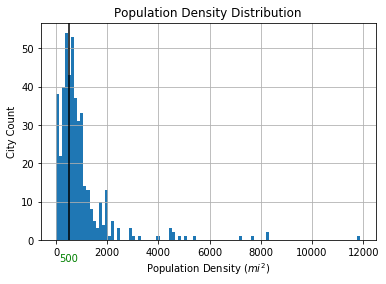

In [70]:
# Plot the value distribution of population density
plt.hist(wind_citypop_df['Density'],bins=100)
# Set vertical line x=500
plt.axvline(x=500,color='black')
# Set title ,xlabel,ylabel and grid
plt.title("Population Density Distribution")
plt.xlabel('Population Density'+' $(mi^2)$')
plt.ylabel('City Count')
plt.grid()
# Creat text
plt.text(500,-6,500,ha='center',va='bottom',color='green')
# Save the plot
plt.savefig("../image/population density.png")



In [ ]:
# We only keep the city with population density no more than 500 per square miles
wind_citypop_lessthan500_df=wind_citypop_df[wind_citypop_df['Density']<=500]
len(wind_citypop_lessthan500_df)

In [73]:
wind_citypop_lessthan500_df

,ID,Element,State,Value,Latitude,Longitude,Elevation,City/Town/County,Density
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4,Akron,255.0
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2,Fleming,296.0
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9,Georgetown,422.0
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Carrol County,374.0
5,USC00218947,AWND,MN,36.561708,45.8619,-96.5650,312.1,Wheaton,288.0
6,USC00252037,AWND,NE,76.425906,42.7364,-97.4969,426.7,Crofton,415.0
7,USC00413340,AWND,TX,35.390978,28.9844,-95.3808,2.4,Freeport,313.0
8,USC00418040,AWND,TX,41.394835,35.7047,-101.5492,894.9,Sanford,456.0
13,USW00003027,AWND,NM,62.465892,35.0028,-105.6628,2159.8,Clines Corners,5.2
14,USW00003028,AWND,CO,52.139804,37.2833,-102.6139,1335.9,Springfield,472.0


### Heatmap of Population Density

In [31]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Store 'Latitude' and 'Longitude' into  locations 
locations =wind_citypop_lessthan500_df[["Latitude", "Longitude"]].astype(float)

Density = wind_citypop_lessthan500_df["Density"].astype(float)

In [46]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights= Density, 
                                 dissipating=False, max_intensity=200,
                                 point_radius = 2)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity =200
heat_layer.point_radius = 0.65



fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))